# Design & Implement Neural network models (Perceprton,SVM,LVQ,SOM) on
# Caesarian classification dataset

In [3]:
import pandas as pd 
data = pd.read_csv("csv.csv") 
#data.head()
#data
df = pd.DataFrame(data)
#First
df1 = df[df.Caesarian=='Yes']
#Second
df2 = df[df.Caesarian=='No']
df.groupby('Caesarian').size()
df.describe()

,Age,Delivey No
count,80.000000,80.000000
mean,27.687500,1.662500
std,5.017927,0.794662
min,17.000000,1.000000
25%,25.000000,1.000000
50%,27.000000,1.000000
75%,32.000000,2.000000
max,40.000000,4.000000


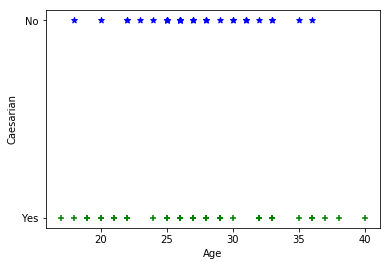

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.xlabel('Age')
plt.ylabel('Caesarian')
plt.scatter(df1['Age'],df1['Caesarian'],color = 'green', marker='+')
plt.scatter(df2['Age'],df2['Caesarian'],color = 'blue', marker='*')

# PERCEPTRON

In [ ]:
import numpy as np
import tensorflow as tf
# creating the input data to our neural network
# Are four elemtents of x1 and x2 columns
data_input_x = np.array([[0.0, 0.0], 
                         [0.0, 1.0],
                         [1.0, 0.0],
                         [1.0, 1.0]])
# creating the classification that we know to out input data ('classe' column)
data_y = np.array([[0.0], [0.0], [0.0], [1.0]])

def step_function(sum_value):
    return tf.cast(tf.to_float(tf.math.greater_equal(sum_value, 1)), tf.float64)

# Define the variables used during de processing
# Two weights to only one neuron
# Weights are initialized with zero
weights = tf.Variable(tf.zeros([2,1], dtype = tf.float64))

# define our outputlayer calculation
output_layer = tf.matmul(data_input_x, weights)

# define our activation function to transform the output layer values into knowed classes (0 or 1)
predictions = step_function(output_layer)

# define score function to evaluate the accuracy
error = tf.subtract(data_y, predictions)

# define delta function used to adjust the weights during the training
delta = tf.matmul(data_input_x, error, transpose_a = True)
learningRate = 0.1
train = tf.assign(weights, tf.add(weights, tf.multiply(delta, learningRate)))

# Create the initializer function TensorFlow Variables used during the processing
init = tf.global_variables_initializer()

with tf.Session() as s:
    s.run(init)
    print('Output layer result: \n', s.run(output_layer))
    print('Prediction result: \n', s.run(predictions))
    print('Error result: \n', s.run(error))
    print('\n')
    for epoch in range(15):
        train_error, _ = s.run([error, train])
        train_error_sum = tf.reduce_sum(train_error)
        print('Epoch: ', epoch+1, ' - Error: ', s.run(train_error_sum))
        if train_error_sum.eval() == 0.0:
            break; # learned and got 100% accuracy
    print('\nWeights to the best accuracy: \n', s.run(weights))

# SVM

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
df=pd.read_csv('csv.csv')
#print(df.head())
y=df.iloc[:,5].values
print(y)
X=df.iloc[:,2:6].values
#print(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
        X,y,test_size=0.2,random_state=0)
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X_train, y_train)
y_pred=svm.predict(X_test)
print('misclassified samples: %d'%(y_test!=y_pred).sum())#compute
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))

# LVQ

In [ ]:
# LVQ 
from random import seed
from random import randrange
from csv import reader
from math import sqrt

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

# Locate the best matching unit
def get_best_matching_unit(codebooks, test_row):
	distances = list()
	for codebook in codebooks:
		dist = euclidean_distance(codebook, test_row)
		distances.append((codebook, dist))
	distances.sort(key=lambda tup: tup[1])
	return distances[0][0]

# Make a prediction with codebook vectors
def predict(codebooks, test_row):
	bmu = get_best_matching_unit(codebooks, test_row)
	return bmu[-1]

# Create a random codebook vector
def random_codebook(train):
	n_records = len(train)
	n_features = len(train[0])
	codebook = [train[randrange(n_records)][i] for i in range(n_features)]
	return codebook

# Train a set of codebook vectors
def train_codebooks(train, n_codebooks, lrate, epochs):
	codebooks = [random_codebook(train) for i in range(n_codebooks)]
	for epoch in range(epochs):
		rate = lrate * (1.0-(epoch/float(epochs)))
		for row in train:
			bmu = get_best_matching_unit(codebooks, row)
			for i in range(len(row)-1):
				error = row[i] - bmu[i]
				if bmu[-1] == row[-1]:
					bmu[i] += rate * error
				else:
					bmu[i] -= rate * error
	return codebooks

# LVQ Algorithm
def learning_vector_quantization(train, test, n_codebooks, lrate, epochs):
	codebooks = train_codebooks(train, n_codebooks, lrate, epochs)
	predictions = list()
	for row in test:
		output = predict(codebooks, row)
		predictions.append(output)
	return(predictions)

# Test LVQ on Ionosphere dataset
seed(1)
# load and prepare data
filename = 'csv.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 5
learn_rate = 0.3
n_epochs = 50
n_codebooks = 20
scores = evaluate_algorithm(dataset, learning_vector_quantization, n_folds, n_codebooks, learn_rate, n_epochs)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

# SOM

In [ ]:
import numpy as np
import tensorflow as tf

from tqdm import tqdm


def learning_rate(epoch: tf.placeholder, max_epochs: int):
    with tf.name_scope('learning_rate'):
        return tf.exp(-4 * epoch / max_epochs)


def neighbourhood(r: tf.placeholder, epoch: tf.placeholder, max_epochs: int, size: int):
    with tf.name_scope('neighbourhood'):
        return tf.exp(
            - (2 * r / size) ** 2
            * (max_epochs / (max_epochs - epoch)) ** 3
        )


class SelfOrganisingMap:
    def __init__(self, shape: tuple, features: int, *_,
                 max_epochs: int = None, init: str = 'uniform', learning_rate: float = 0.1):
        """
        Self-organising map using TensorFlow.

        :param shape: map dimensions
        :param features: number of input features
        :param _: used to force calling with keyword arguments below
        :param max_epochs: used to scale the neighbourhood and learning rate functions
        :param init: method of weight initialisation. 'uniform' for drawing from an uniform
            distribution between 0..1, 'normal' for drawing from X~N(0,1)
        :param learning_rate: initial learning rate multiplier
        """
        self._weights = None

        self._shape = shape
        self._features = features
        self._neighbour_shape = (len(shape),) + tuple(1 for _ in shape) + (-1,)

        self._epochs = 0
        self._max_epochs = max_epochs
        self._initial_lr = learning_rate

        if init == 'uniform':
            self._initialiser = tf.random_uniform_initializer
        elif init == 'normal':
            self._initialiser = tf.random_normal_initializer
        else:
            raise AssertionError('Unknown weights initialiser type "%s"!' % init)

    @property
    def weights(self):
        if self._weights is None:
            raise ValueError('Map not fitted!')
        return self._weights

    @property
    def initialiser(self):
        if self._weights is None:
            return self._initialiser
        else:
            return tf.convert_to_tensor(self._weights)

    @property
    def shape(self): return self._shape

    @property
    def n_nodes(self): return int(np.prod(self.shape))

    @property
    def features(self): return self._features

    @property
    def epochs(self): return self._epochs

    @property
    def max_epochs(self): return self._max_epochs

    def project(self, data: np.ndarray) -> np.array:
        """
        Project data onto the map. NumPy implementation for simplicity.

        :param data: samples
        :return: node indices
        """
        diff = self.weights - data
        dist = np.sum(diff ** 2, axis=-1, keepdims=True)
        return np.array(np.unravel_index(
            np.argmin(dist.reshape((-1, data.shape[0])), axis=0), self.shape
        ))

    def train(self, x: np.ndarray, epochs: int, batch_size: int = 1) -> None:
        """
        Create training graph and train SOM.

        :param x: training data
        :param epochs: number of epochs to train
        :param batch_size: number of training examples per step
        :return: None
        """
        graph = tf.Graph()
        sess = tf.Session(graph=graph)

        x = x.astype(np.float64)

        if x.shape[0] % batch_size != 0:
            raise ValueError('Bad batch_size, last batch would be incomplete!')

        # Construct graph
        with graph.as_default():
            indices = tf.convert_to_tensor(np.expand_dims(
                np.indices(self.shape, dtype=np.float64), axis=-1
            ))
            weights = tf.get_variable(
                'weights', (*self.shape, 1, self.features), initializer=self.initialiser, dtype=tf.float64
            )

            with tf.name_scope('data'):
                data = tf.data.Dataset.from_tensor_slices(x)
                data = data.shuffle(buffer_size=10000).repeat(epochs)
                data = data.batch(batch_size, drop_remainder=True)
                data = data.make_one_shot_iterator().get_next()

            with tf.name_scope('winner'):
                diff = weights - data
                dist = tf.reduce_sum(diff ** 2, axis=-1, keepdims=True)
                w_ix = tf.argmin(tf.reshape(dist, (self.n_nodes, data.shape[0])), axis=0)
                winner_op = tf.convert_to_tensor(tf.unravel_index(w_ix, self.shape))

            with tf.name_scope('update'):
                curr_epoch = tf.placeholder(dtype=tf.int64, shape=())

                idx_diff = indices - tf.reshape(tf.cast(
                    winner_op, dtype=tf.float64
                ), shape=self._neighbour_shape)
                idx_dist = tf.norm(idx_diff, axis=0)

                l_rate = learning_rate(curr_epoch, self.max_epochs)
                n_hood = neighbourhood(
                    idx_dist, curr_epoch, self.max_epochs, max(self.shape)
                )

                update = diff * l_rate * tf.expand_dims(n_hood, axis=-1)
                update_op = weights.assign(
                    weights - self._initial_lr * tf.reduce_sum(update, axis=-2, keepdims=True)
                )

            init = tf.global_variables_initializer()

        # Initialise all variables
        sess.run(init)

        batches = int(np.ceil(x.shape[0] // batch_size))
        for i in tqdm(range(epochs)):
            for b in range(batches):
                sess.run(update_op, feed_dict={
                    curr_epoch: self.epochs + i
                })

        self._weights = sess.run(weights)
        self._epochs += epochs

In [ ]:
from sklearn.utils import shuffle
from sklearn.datasets import load_iris
from sklearn.preprocessing import RobustScaler

a, _ = load_iris(True)
a, _ = shuffle(a, _)
a = RobustScaler().fit_transform(a)

epochs = 100
som = SelfOrganisingMap((100, 100), 4, max_epochs=epochs, init='normal')
som.train(a, epochs, batch_size=1)